## Project Goal

My project goal is to see how China's trade patterns have adjusted over the course of the last 5 years with data available from China.

We will need to take the trading data available to us, combine it into a single master data set, then pull from that data set and create data frames in order to develop conclusions about the data.

We will first go over the data by grouping by continents. Thankfully, the master data set already has a grouping that categorizes all the countries by continent. So this data frame should be easier.

Now with this, we can develop some conclusions!

After that, we will introduce a control to see if this changes our data. This control will be global GDP growth from the last 5 years. If we control for global GDP growth, does this change our data at all?

After this, we will introduce our last data set, which is the democracy score. We will see how china's trade with countries with any ordinal value of democracy score has been changing. Can we conclude anything from this?

## Making the Master Data Set

In order to start, we have to make the Master data set.

How do we go about this?

Well first let's go to our source.

The General Administration of Customs, People's Republic of China website has a statistics page with all the information we need: http://english.customs.gov.cn/Statistics/Statistics?ColumnId=6

From here, we would select the year and download each months data set. We are doing 2019 January-2024 June. So it will a little over 60-65 excel sheets.

From here, we can order each of the excel sheets into a 5 folders labeled by fiscal year. From there, we can open up a new excel and enter into power query from the data tab. We can then combine and load them into a new fiscal year combination.

After this we can create another power query with the combined excels, from there, we can create some new columns that will properly group the data by month, then year.

Now we have our master data set!

Let's get to data cleaning!

## Cleaning the Master Data Set and Making new Data Frames

I will first show how I did it in google colab where I did my experimentation:

In [1]:
#import pandas as pd from google.colab 
#import drive drive.mount('/content/drive') 
#import os  
#Set the search parameters  
#Make sure to replace 'music1.xlsx' with actual name of your file in your directory file_path = '/content/drive/My Drive/Everything.xlsx'  
#df = pd.read_excel(file_path) # Use smaller data types where possible  
#print(df.head()) # View the first few rows print 
#(df.info()) # Check column types and missing values print 
#(df.describe()) # Summarize numerical data  
#df = df.dropna() # Example: Drop rows with missing values 

Now we can look at how it will be done in jupyter in this quarto document.

In [2]:
import pandas as pd
file_path = 'C:/Users/jonca/Downloads/New Final Project/All Trade Information/Everything.xlsx'
df = pd.read_excel(file_path) # Use smaller data types where possible
print(df.head()) # View the first few rows print
(df.info()) # Check column types and missing values print
(df.describe()) # Summarize numerical data 
df = df.dropna() # Example: Drop rows with missing values 

        Source Month  Month_num  Year  \
0  Jan_Feb.xls   Jan          1  2019   
1  Jan_Feb.xls   Jan          1  2019   
2  Jan_Feb.xls   Jan          1  2019   
3  Jan_Feb.xls   Jan          1  2019   
4  Jan_Feb.xls   Jan          1  2019   

                                      Country/region Total for Month  \
0  (2) Imports and Exports by Country (Region) of...             NaN   
1                                                NaN             NaN   
2                                   Country (Region)           Total   
3                                                NaN          1 to 2   
4                                              TOTAL     591,992,771   

  Total YTD Exports for Month        Exports YTD Imports for Month  \
0       NaN               NaN                NaN               NaN   
1       NaN               NaN                NaN               NaN   
2   Exports           Imports  Percentage Change               NaN   
3       NaN            1 to 2           

We made it! We have a working master data set. Let's get to work on the first analysis. We'll start with Africa. Remember, we are trying to see if there is anything statistically significant about China's trade with any of these regions of the world in the last 5 years. 

What we will first do is filter the data by Region, only picking up the data points which are related to Africa.

After that, we'll clean up the columns we will be using to measure and create some visualizations.

In [3]:
africa_df = df[(df['Country/region'] == 'Africa:') & (df['Year'].between(2019, 2025))]
africa_df['Year'] = pd.to_numeric(africa_df['Year'], errors='coerce')
africa_df = africa_df.sort_values(by='Year')
africa_df = africa_df.dropna(subset=['Total for Month'])
africa_df = africa_df.dropna(subset=['Month_num'])
africa_df = africa_df.dropna(subset=['Exports for Month'])
africa_df = africa_df.dropna(subset=['Imports for Month'])
africa_df
import statsmodels.api as sm
print(africa_df.columns)  # Check column names
print(africa_df['Total for Month'].head())  # Inspect the column values
# Ensure it's treated as a string, remove commas and spaces, and convert to numeric
africa_df['Total for Month'] = (
    africa_df['Total for Month']
    .astype(str)  # Convert to string if it's not already
    .str.replace(',', '', regex=True)  # Remove commas
    .str.strip()  # Remove leading/trailing spaces
)
africa_df['Total for Month'] = pd.to_numeric(africa_df['Total for Month'], errors='coerce')  # Convert to numeric
africa_df = africa_df.dropna(subset=['Total for Month'])  # Drop rows where 'Total for Month:' is NaN

print(africa_df['Exports for Month'].head())  # Inspect the column values
# Ensure it's treated as a string, remove commas and spaces, and convert to numeric
africa_df['Exports for Month'] = (
    africa_df['Exports for Month']
    .astype(str)  # Convert to string if it's not already
    .str.replace(',', '', regex=True)  # Remove commas
    .str.strip()  # Remove leading/trailing spaces
)
africa_df['Exports for Month'] = pd.to_numeric(africa_df['Exports for Month'], errors='coerce')  # Convert to numeric
africa_df = africa_df.dropna(subset=['Exports for Month'])  # Drop rows where 'Total for Month:' is NaN

print(africa_df['Imports for Month'].head())  # Inspect the column values
# Ensure it's treated as a string, remove commas and spaces, and convert to numeric
africa_df['Imports for Month'] = (
    africa_df['Imports for Month']
    .astype(str)  # Convert to string if it's not already
    .str.replace(',', '', regex=True)  # Remove commas
    .str.strip()  # Remove leading/trailing spaces
)
africa_df['Imports for Month'] = pd.to_numeric(africa_df['Imports for Month'], errors='coerce')  # Convert to numeric
africa_df = africa_df.dropna(subset=['Imports for Month'])  # Drop rows where 'Total for Month:' is NaN

C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\3427605775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Year'] = pd.to_numeric(africa_df['Year'], errors='coerce')


Index(['Source', 'Month', 'Month_num', 'Year', 'Country/region',
       'Total for Month', 'Total YTD', 'Exports for Month', 'Exports YTD',
       'Imports for Month', 'Imports YTD', 'Percentage Change YoY',
       'Exports YoY change', 'Imports YoY change'],
      dtype='object')
310     14,648,114
566     13,925,104
821     12,816,793
1077    14,516,751
1333    18,981,787
Name: Total for Month, dtype: object
310      7,724,990
566      8,728,377
821      8,755,322
1077     9,547,297
1333    10,459,876
Name: Exports for Month, dtype: object
310     6,923,125
566     5,196,727
821     4,061,471
1077    4,969,454
1333    8,521,911
Name: Imports for Month, dtype: object


## Analysis Part 1
Now that is done, lets first start with some exploratory statistics.

In [4]:
import statistics
import math

print(statistics.mean(africa_df['Total for Month']))
print(statistics.median(africa_df['Total for Month']))
print(statistics.stdev(africa_df['Total for Month']))
print(statistics.mean(africa_df['Exports for Month']))
print(statistics.median(africa_df['Exports for Month']))
print(statistics.stdev(africa_df['Exports for Month']))
print(statistics.mean(africa_df['Imports for Month']))
print(statistics.median(africa_df['Imports for Month']))
print(statistics.stdev(africa_df['Imports for Month']))

21276914.120689657
22136448.5
3854695.2326613143
12689192.931034483
13225265.0
2576085.664632353
8587721.327586208
8768622.5
1644272.293713047


## Analysis Part 2
It doesn't seem like there is any conclusions we can draw from this summary statistics. Let's move on to the plotting of the data to see if we can draw any conclusions!

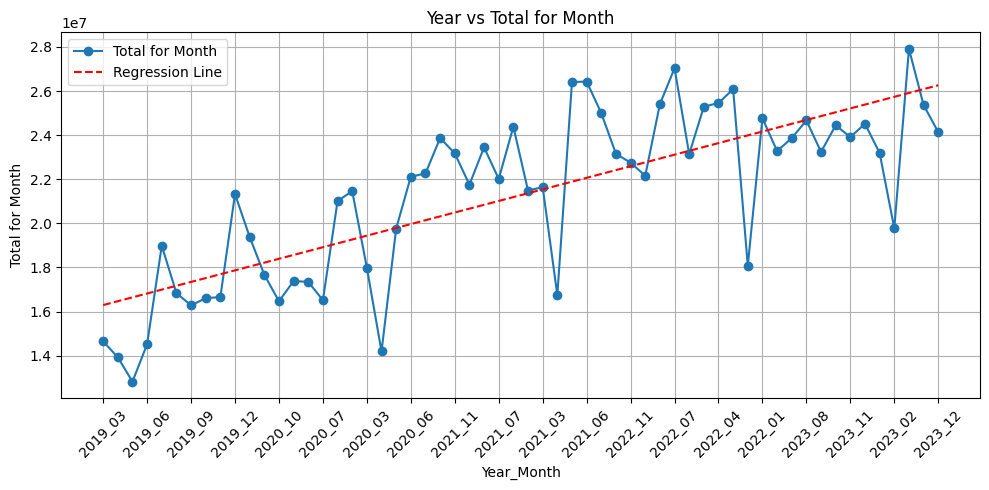

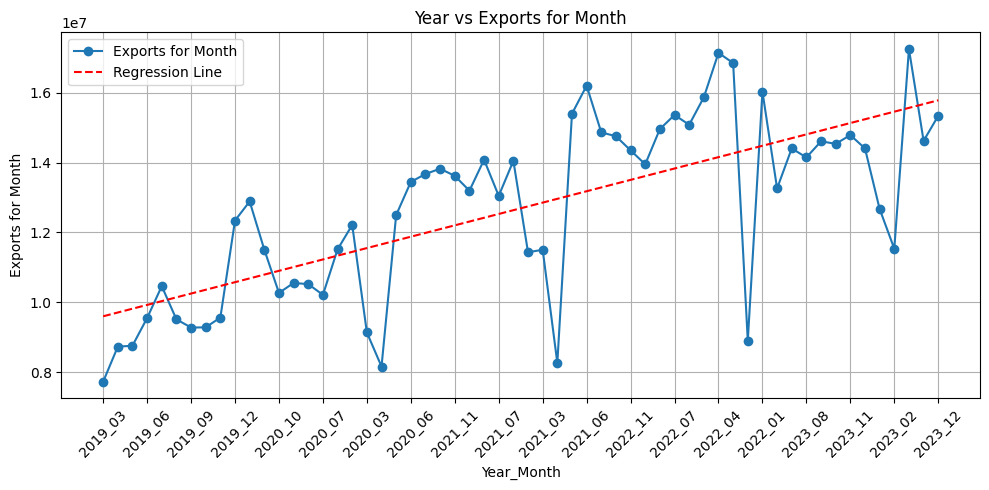

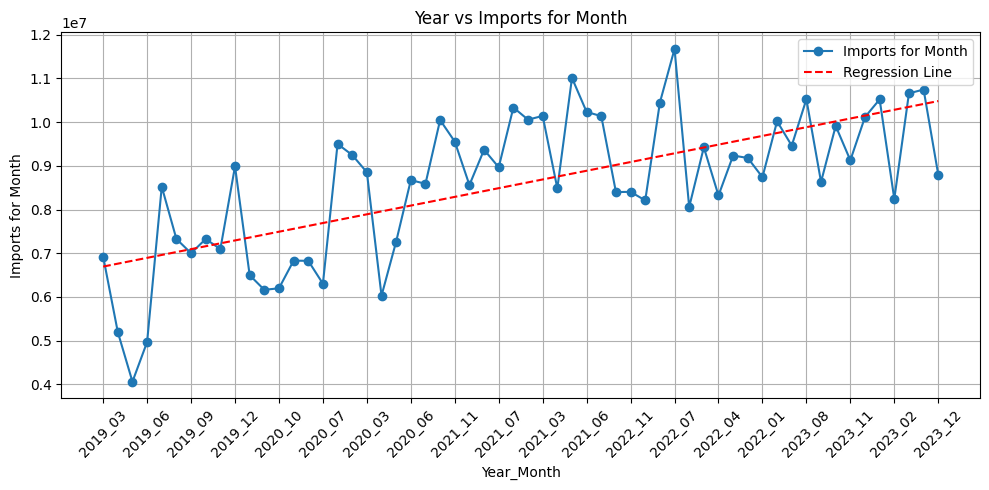

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def format_month(month):
    return f"{month:02}"

africa_df['Year_Month'] = africa_df['Year'].astype(str) + '_' + africa_df['Month_num'].apply(format_month)

X_numeric = np.arange(len(africa_df))  # Use a simple index as X-values
X = africa_df['Year_Month']  # Use 'Year_Month' as X for plots

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = africa_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)

    # Configure x-ticks: show only every third label
    tick_positions = np.arange(0, len(X), 3)
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each variable with its regression line
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month')

We see somewhat of a seasonal drop of exports and on a lesser extent, imports on the 4th month of the year. That's all that can really be pulled from these in my opinion.
But if you see other things you can pull from this plot, then let me know.

In [6]:
X = africa_df[['Year']]  # Independent variable (assuming 'year' is clean)
Y = africa_df['Total for Month']  # Dependent variable
X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     75.83
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.36e-12
Time:                        22:21:52   Log-Likelihood:                -936.52
No. Observations:                  58   AIC:                             1877.
Df Residuals:                      56   BIC:                             1881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.199e+09   4.85e+08     -8.664      0.0

I did a regression to see if there was anything statistically significant here, and it didn't seem so. Let's move on.
Now we are going to control for global gdp growth to see if any conclusions seem to pop up!
## Analysis Part 3

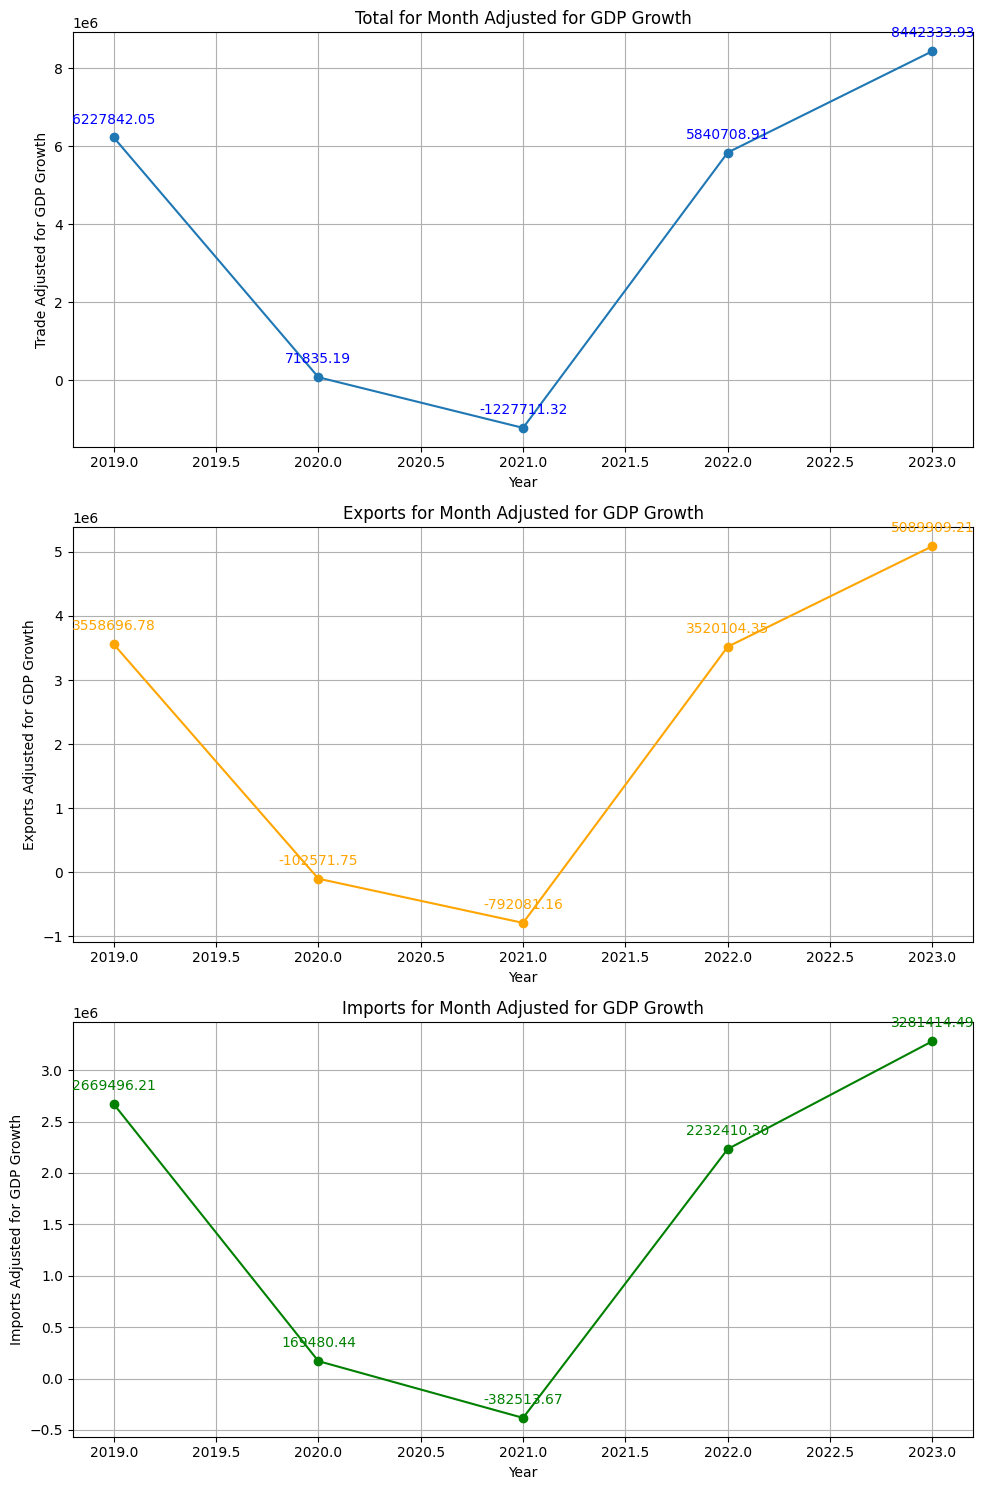

In [7]:
# Convert 'Year_Month' to datetime
africa_df['Date'] = pd.to_datetime(africa_df['Year_Month'], format='%Y_%m')

# Set 'Date' as index
africa_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
africa_df[numeric_columns] = africa_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for NaNs after conversion
africa_df.dropna(subset=numeric_columns, inplace=True)

# Resample and compute median only for the selected numeric columns
annual_median = africa_df[numeric_columns].resample('YE').median()

# Update the index to display only the year
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {
    2019: 2.64,
    2020: -2.93,
    2021: 6.26,
    2022: 3.09,
    2023: 2.72
}

# Normalize data by GDP growth
for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

# Apply a rolling window for smoothing
smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting each metric separately
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Function to annotate each plot
def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

# Plot Total for Month
axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

# Plot Exports for Month
axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

# Plot Imports for Month
axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From here we can see that export data seem to be significantly more delicate than import data.
The decline from export data is steeper and it's ascension is steeper as well.

Now let's compare these across regions!

Index(['Source', 'Month', 'Month_num', 'Year', 'Country/region',
       'Total for Month', 'Total YTD', 'Exports for Month', 'Exports YTD',
       'Imports for Month', 'Imports YTD', 'Percentage Change YoY',
       'Exports YoY change', 'Imports YoY change'],
      dtype='object')
372     63,539,431
628     69,714,419
883     70,919,072
1139    75,741,850
1395    75,594,395
Name: Total for Month, dtype: object
372     33,257,403
628     42,660,072
883     46,408,096
1139    46,422,624
1395    44,778,928
Name: Exports for Month, dtype: object
372     30,282,027
628     27,054,347
883     24,510,977
1139    29,319,227
1395    30,815,467
Name: Imports for Month, dtype: object
94443995.5862069
98635218.5
13121895.65687232
56122113.06896552
57908192.5
8633309.900465557
38321882.51724138
39908139.0
5228567.690341682


C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\2678165451.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df['Year'] = pd.to_numeric(europe_df['Year'], errors='coerce')


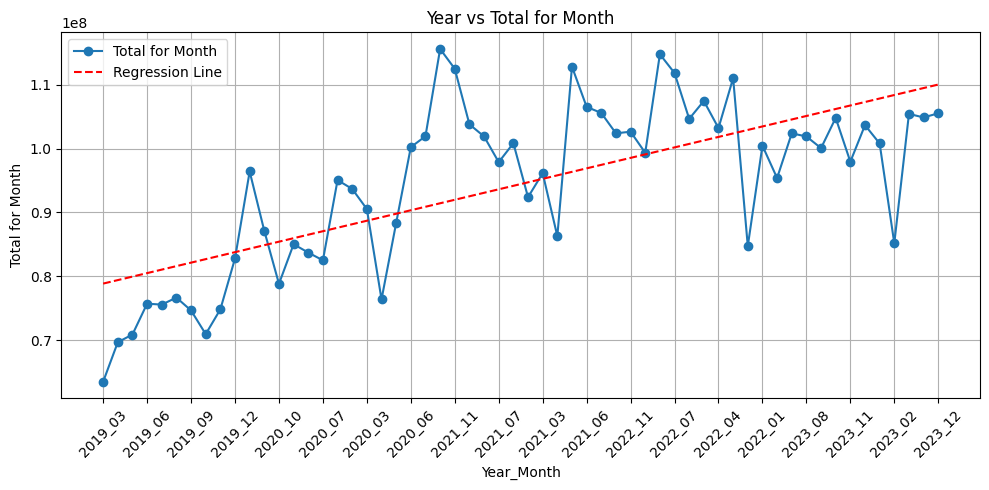

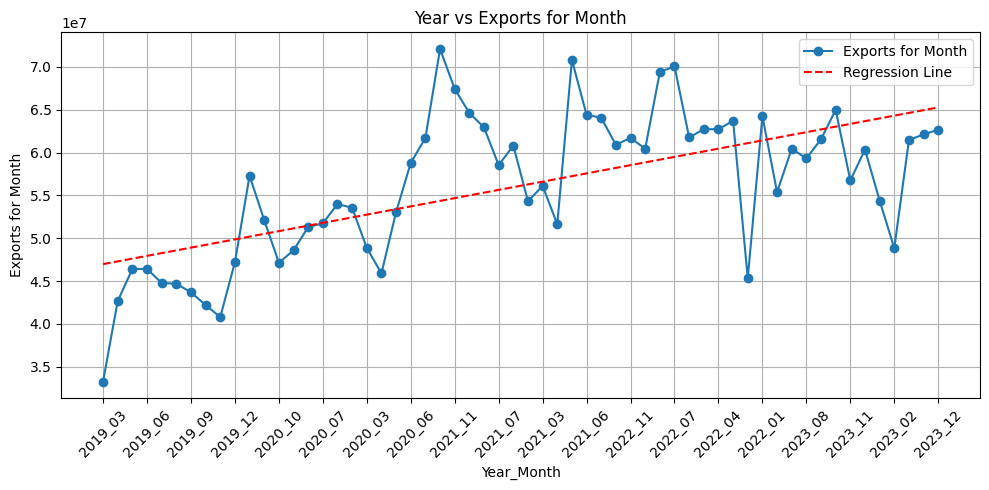

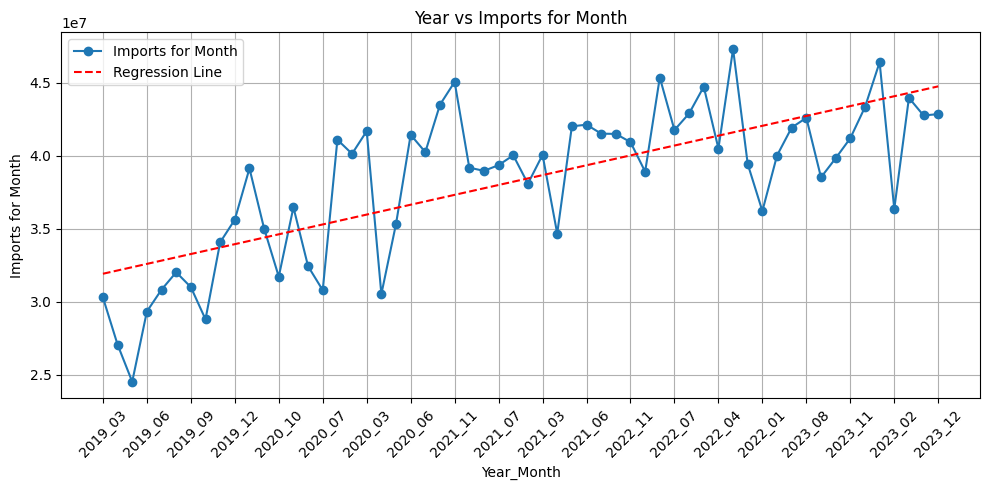

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     61.26
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.49e-10
Time:                        22:21:53   Log-Likelihood:                -1011.0
No. Observations:                  58   AIC:                             2026.
Df Residuals:                      56   BIC:                             2030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.36e+10   1.75e+09     -7.773      0.0

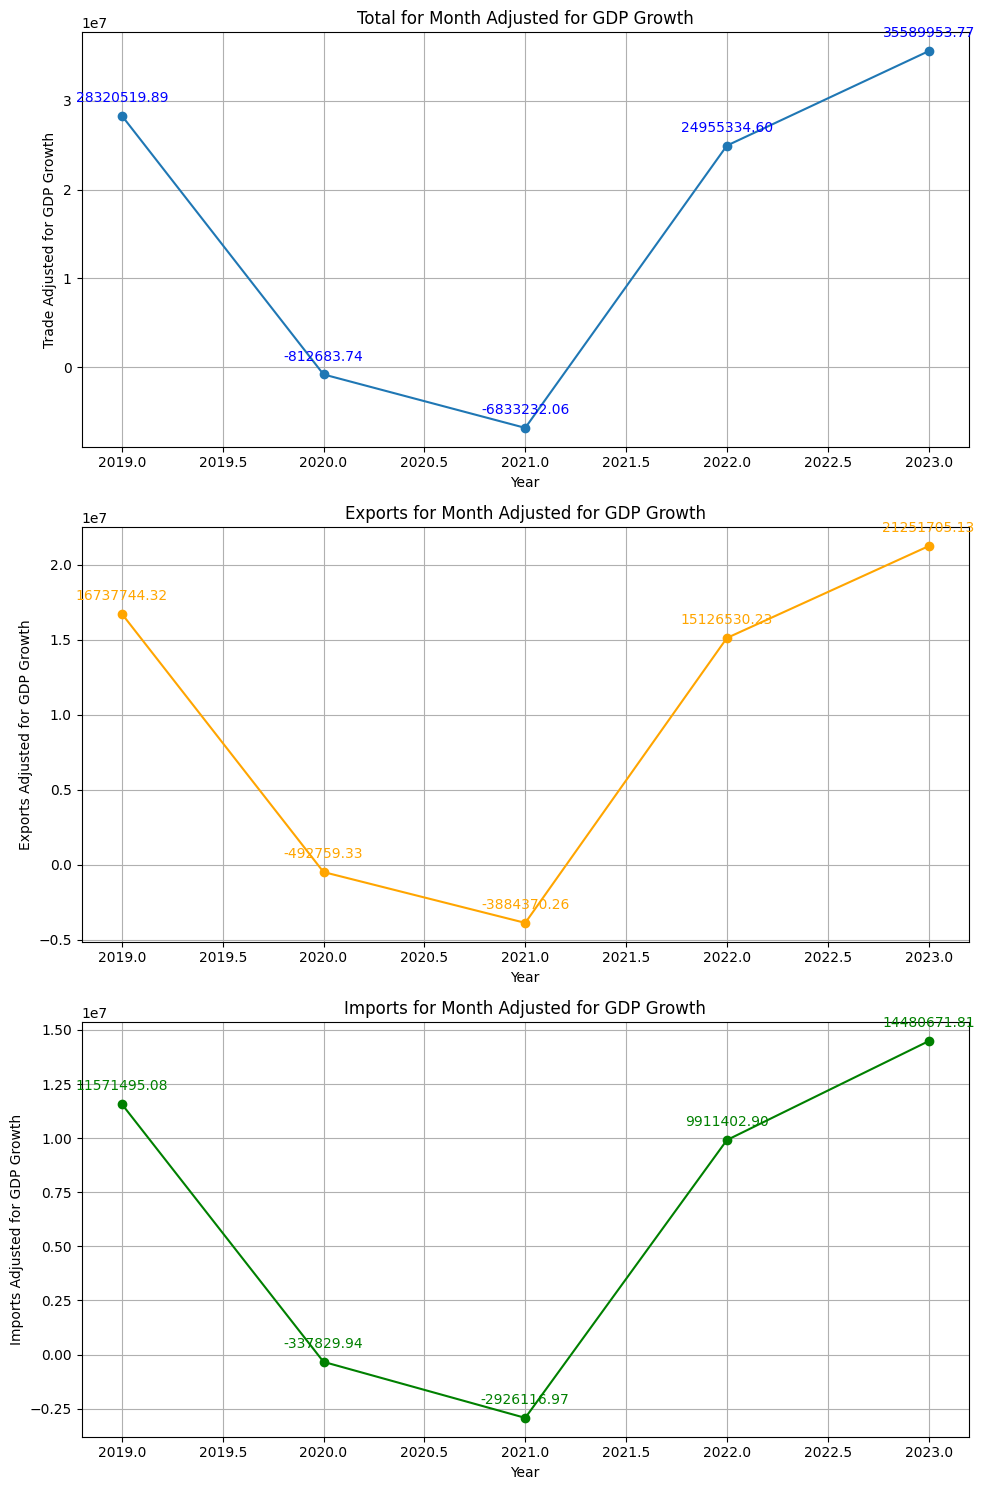

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

# Assuming df is your initial DataFrame
europe_df = df[(df['Country/region'] == 'Europe:') & (df['Year'].between(2019, 2025))]
europe_df['Year'] = pd.to_numeric(europe_df['Year'], errors='coerce')
europe_df = europe_df.sort_values(by='Year')
europe_df = europe_df.dropna(subset=['Total for Month'])
europe_df = europe_df.dropna(subset=['Month_num'])
europe_df = europe_df.dropna(subset=['Exports for Month'])
europe_df = europe_df.dropna(subset=['Imports for Month'])

# Check column names and inspect data
print(europe_df.columns) 
print(europe_df['Total for Month'].head())

# Convert 'Total for Month' to numeric
europe_df['Total for Month'] = (
    europe_df['Total for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
europe_df['Total for Month'] = pd.to_numeric(europe_df['Total for Month'], errors='coerce')
europe_df = europe_df.dropna(subset=['Total for Month'])

# Convert 'Exports for Month' to numeric
print(europe_df['Exports for Month'].head())
europe_df['Exports for Month'] = (
    europe_df['Exports for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
europe_df['Exports for Month'] = pd.to_numeric(europe_df['Exports for Month'], errors='coerce')
europe_df = europe_df.dropna(subset=['Exports for Month'])

# Convert 'Imports for Month' to numeric
print(europe_df['Imports for Month'].head())
europe_df['Imports for Month'] = (
    europe_df['Imports for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
europe_df['Imports for Month'] = pd.to_numeric(europe_df['Imports for Month'], errors='coerce')
europe_df = europe_df.dropna(subset=['Imports for Month'])

# Statistics
print(statistics.mean(europe_df['Total for Month']))
print(statistics.median(europe_df['Total for Month']))
print(statistics.stdev(europe_df['Total for Month']))
print(statistics.mean(europe_df['Exports for Month']))
print(statistics.median(europe_df['Exports for Month']))
print(statistics.stdev(europe_df['Exports for Month']))
print(statistics.mean(europe_df['Imports for Month']))
print(statistics.median(europe_df['Imports for Month']))
print(statistics.stdev(europe_df['Imports for Month']))

# Format month and create 'Year_Month'
def format_month(month):
    return f"{month:02}"

europe_df['Year_Month'] = europe_df['Year'].astype(str) + '_' + europe_df['Month_num'].apply(format_month)

X_numeric = np.arange(len(europe_df))
X = europe_df['Year_Month']

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = europe_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)

    tick_positions = np.arange(0, len(X), 3)
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot with regression lines
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month')

# OLS Regression
X = europe_df[['Year']]
Y = europe_df['Total for Month']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Convert 'Year_Month' to datetime and set as index
europe_df['Date'] = pd.to_datetime(europe_df['Year_Month'], format='%Y_%m')
europe_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
europe_df[numeric_columns] = europe_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

europe_df.dropna(subset=numeric_columns, inplace=True)

# Annual median calculations
annual_median = europe_df[numeric_columns].resample('YE').median()
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {2019: 2.64, 2020: -2.93, 2021: 6.26, 2022: 3.09, 2023: 2.72}

for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

plt.tight_layout()
plt.show()

['TOTAL' 'Asia:' 'Afghanistan ' 'Bahrian ' 'Bangladesh' 'Bhutan' 'Brunei'
 'Myanmar ' 'Cambodia' 'Cyprus' 'Korea,DPR ' 'China Hong Kong' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kuwait ' 'Lao PDR'
 'Lebanon' 'China Macau ' 'Malaysia' 'Maldives' 'Mongolia' 'Nepal,FDR'
 'Oman' 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Saudi Arabia '
 'Singapore ' 'Korea,Rep.' 'Sri Lanka' 'Syrian Arab Republic' 'Thailand'
 'Turkey' 'United Arab Emirates' 'Yemen' 'Viet Nam' 'China' 'China Taiwan'
 'Timor-Leste ' 'Kazakhstan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan'
 'Uzbekistan' 'Oth.Asia nes' 'Africa:' 'Algeria' 'Angola' 'Benin'
 'Botswana' 'Burundi' 'Cameroon' 'Canary Islands' 'Cape Verde '
 'Central African Rep.' 'Ceuta' 'Chad' 'Comoros' 'Congo' 'Djibouti'
 'Egypt ' 'Equatorial Guinea' 'Ethiopia ' 'Gabon' 'Gambia ' 'Ghana'
 'Guinea' 'Guinea-Bissau' "Cote d'Ivoire" 'Kenya' 'Liberia'
 'Libyan Arab Jamahiriya' 'Madagascar' 'Malawi' 'Mali ' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozam

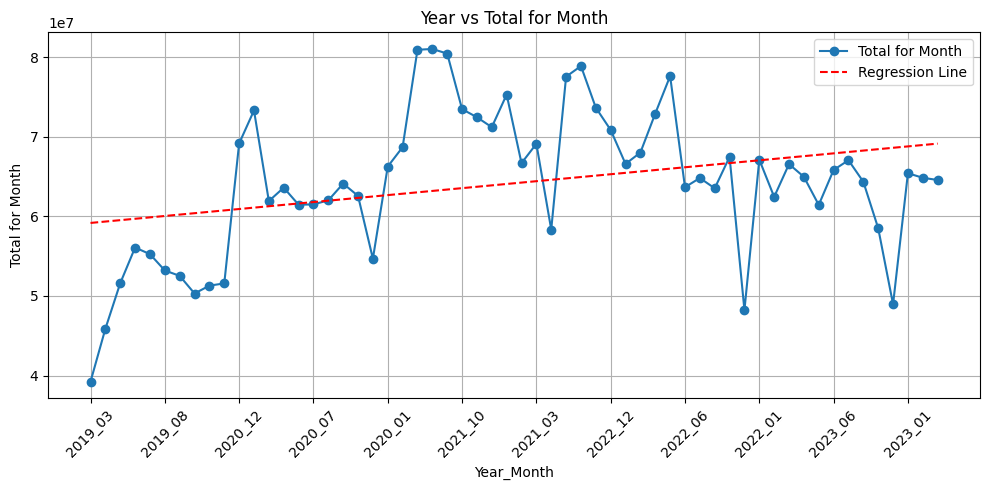

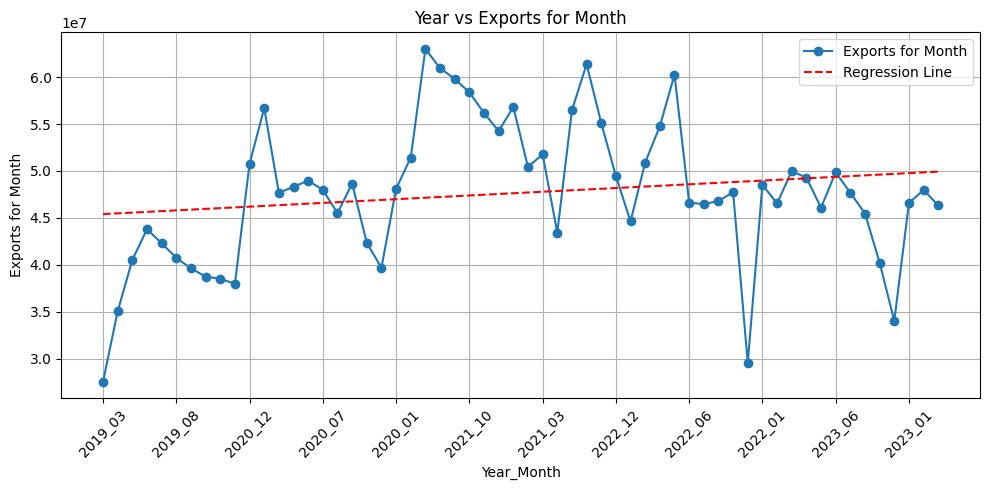

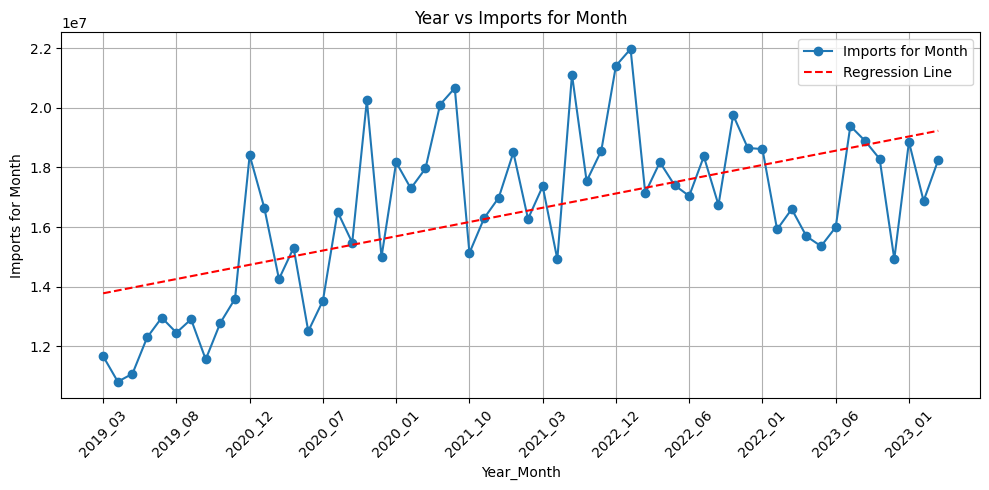

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     8.977
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00407
Time:                        22:21:54   Log-Likelihood:                -1007.9
No. Observations:                  58   AIC:                             2020.
Df Residuals:                      56   BIC:                             2024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.907e+09   1.66e+09     -2.958      0.0

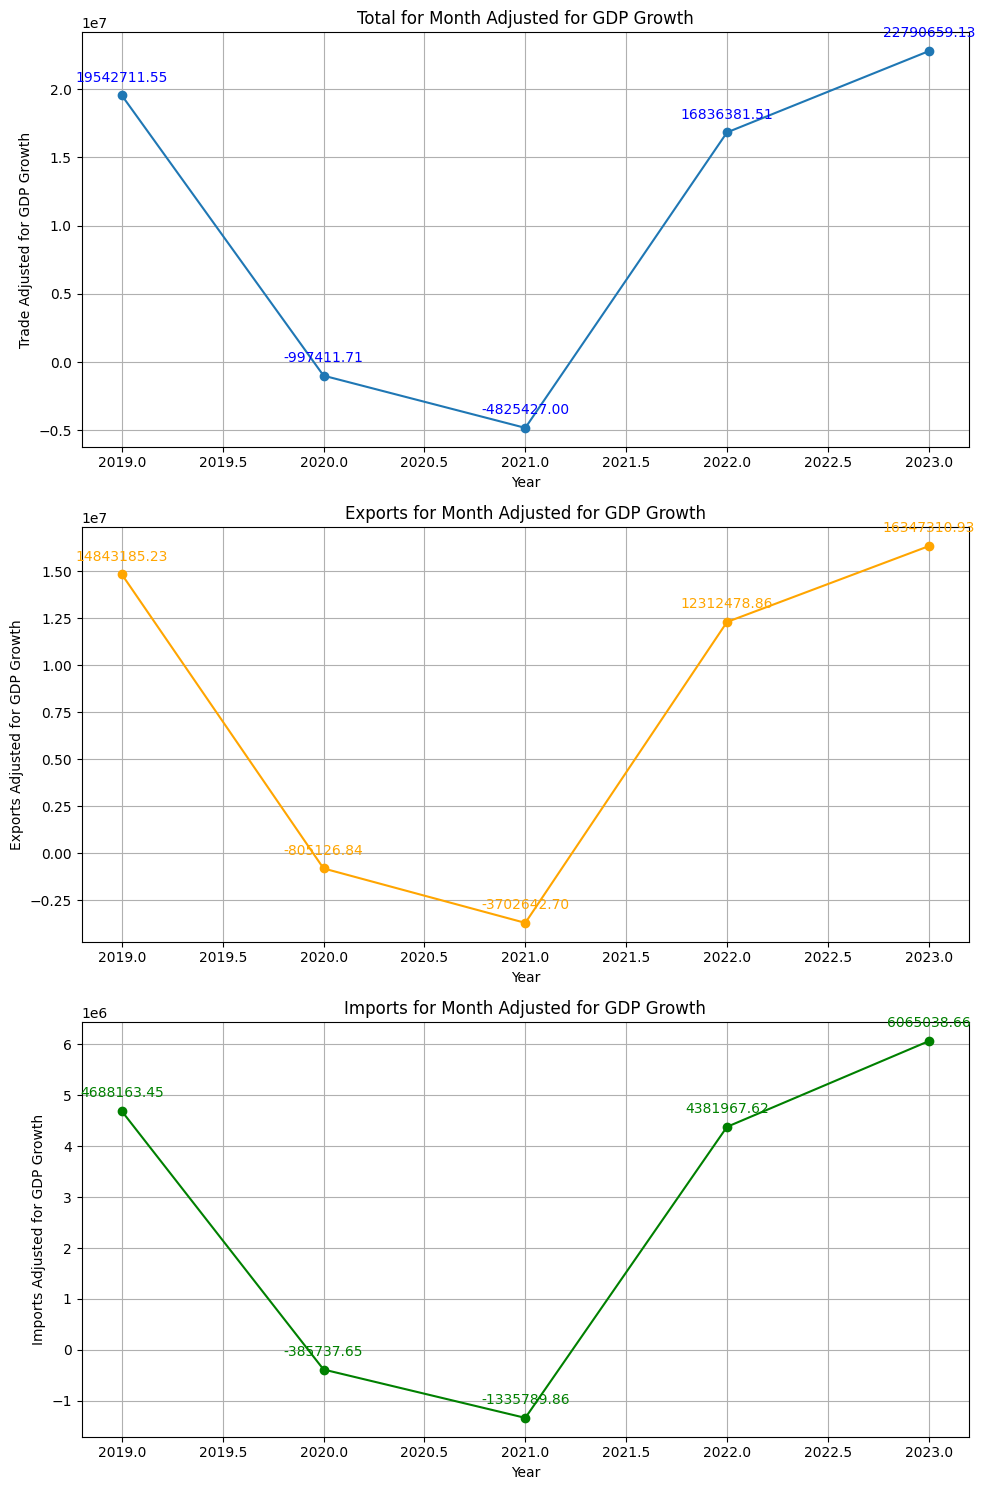

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

# Step 1: Verify unique values (optional, for debugging)
print(df['Country/region'].unique())

# Step 2: Filter the DataFrame for North America
north_america_df = df[
    df['Country/region'].str.contains('North America:', case=False, na=False) &
    df['Year'].between(2019, 2024)  # Adjust year range if needed
].copy()

# Step 3: Convert 'Year' to numeric
north_america_df['Year'] = pd.to_numeric(north_america_df['Year'], errors='coerce')

# Step 4: Sort by 'Year'
north_america_df = north_america_df.sort_values(by='Year')

# Step 5: Drop rows with NaN in 'Total for Month'
north_america_df = north_america_df.dropna(subset=['Total for Month'])

# Step 6: Inspect column names and values (optional, for debugging)
print(north_america_df.columns)
print(north_america_df['Total for Month'].head())

# Step 7: Clean and convert 'Total for Month' to numeric
north_america_df['Total for Month'] = (
    north_america_df['Total for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
north_america_df['Total for Month'] = pd.to_numeric(north_america_df['Total for Month'], errors='coerce')
north_america_df = north_america_df.dropna(subset=['Total for Month'])

# Repeat similar cleaning for 'Exports for Month' and 'Imports for Month'
columns_to_clean = ['Exports for Month', 'Imports for Month']
for column in columns_to_clean:
    print(north_america_df[column].head())  # Inspect the column values
    north_america_df[column] = (
        north_america_df[column]
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.strip()
    )
    north_america_df[column] = pd.to_numeric(north_america_df[column], errors='coerce')
    north_america_df = north_america_df.dropna(subset=[column])

# Calculate statistics
print(statistics.mean(north_america_df['Total for Month']))
print(statistics.median(north_america_df['Total for Month']))
print(statistics.stdev(north_america_df['Total for Month']))
print(statistics.mean(north_america_df['Exports for Month']))
print(statistics.median(north_america_df['Exports for Month']))
print(statistics.stdev(north_america_df['Exports for Month']))
print(statistics.mean(north_america_df['Imports for Month']))
print(statistics.median(north_america_df['Imports for Month']))
print(statistics.stdev(north_america_df['Imports for Month']))

# Create 'Year_Month' for plotting
north_america_df['Year_Month'] = north_america_df['Year'].astype(str) + '_' + north_america_df['Month_num'].apply(lambda x: f"{x:02}")

X_numeric = np.arange(len(north_america_df))
X = north_america_df['Year_Month']

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = north_america_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)
    
    tick_positions = np.arange(0, len(X), max(1, len(X)//10))  # Adjust tick frequency
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each variable with its regression line
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month')

# OLS Regression
X = north_america_df[['Year']]
Y = north_america_df['Total for Month']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Convert 'Year_Month' to datetime and set as index
north_america_df['Date'] = pd.to_datetime(north_america_df['Year_Month'], format='%Y_%m')
north_america_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
north_america_df[numeric_columns] = north_america_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
north_america_df.dropna(subset=numeric_columns, inplace=True)

# Resample and compute median only for the selected numeric columns
annual_median = north_america_df[numeric_columns].resample('YE').median()
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {2019: 2.64, 2020: -2.93, 2021: 6.26, 2022: 3.09, 2023: 2.72}
for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

plt.tight_layout()
plt.show()

['TOTAL' 'Asia:' 'Afghanistan ' 'Bahrian ' 'Bangladesh' 'Bhutan' 'Brunei'
 'Myanmar ' 'Cambodia' 'Cyprus' 'Korea,DPR ' 'China Hong Kong' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kuwait ' 'Lao PDR'
 'Lebanon' 'China Macau ' 'Malaysia' 'Maldives' 'Mongolia' 'Nepal,FDR'
 'Oman' 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Saudi Arabia '
 'Singapore ' 'Korea,Rep.' 'Sri Lanka' 'Syrian Arab Republic' 'Thailand'
 'Turkey' 'United Arab Emirates' 'Yemen' 'Viet Nam' 'China' 'China Taiwan'
 'Timor-Leste ' 'Kazakhstan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan'
 'Uzbekistan' 'Oth.Asia nes' 'Africa:' 'Algeria' 'Angola' 'Benin'
 'Botswana' 'Burundi' 'Cameroon' 'Canary Islands' 'Cape Verde '
 'Central African Rep.' 'Ceuta' 'Chad' 'Comoros' 'Congo' 'Djibouti'
 'Egypt ' 'Equatorial Guinea' 'Ethiopia ' 'Gabon' 'Gambia ' 'Ghana'
 'Guinea' 'Guinea-Bissau' "Cote d'Ivoire" 'Kenya' 'Liberia'
 'Libyan Arab Jamahiriya' 'Madagascar' 'Malawi' 'Mali ' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozam

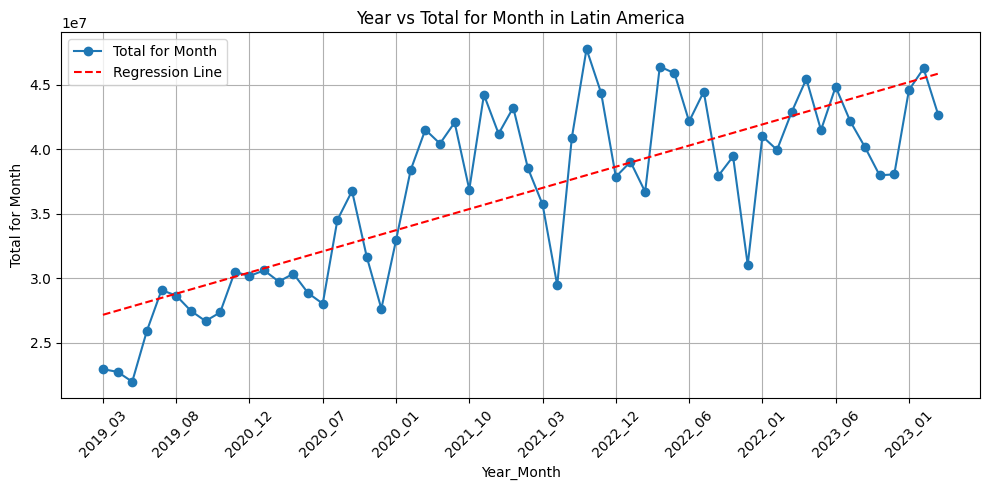

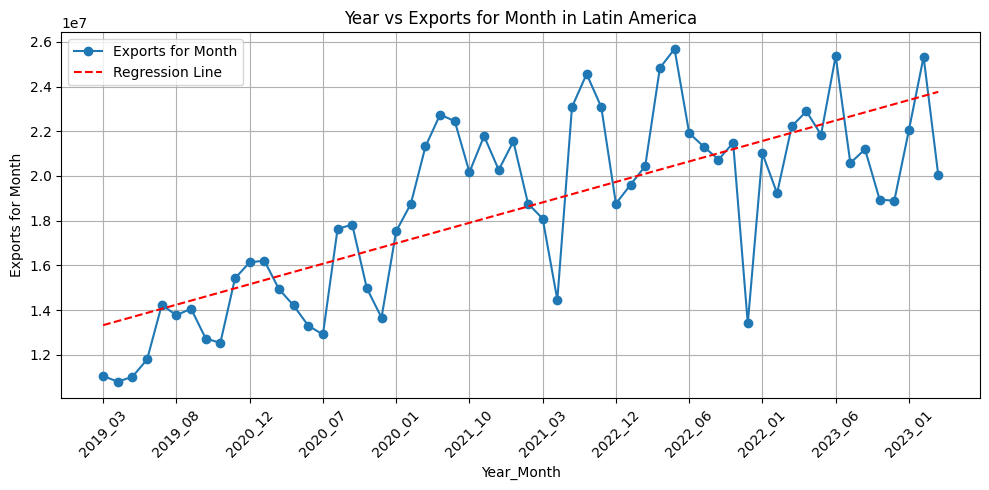

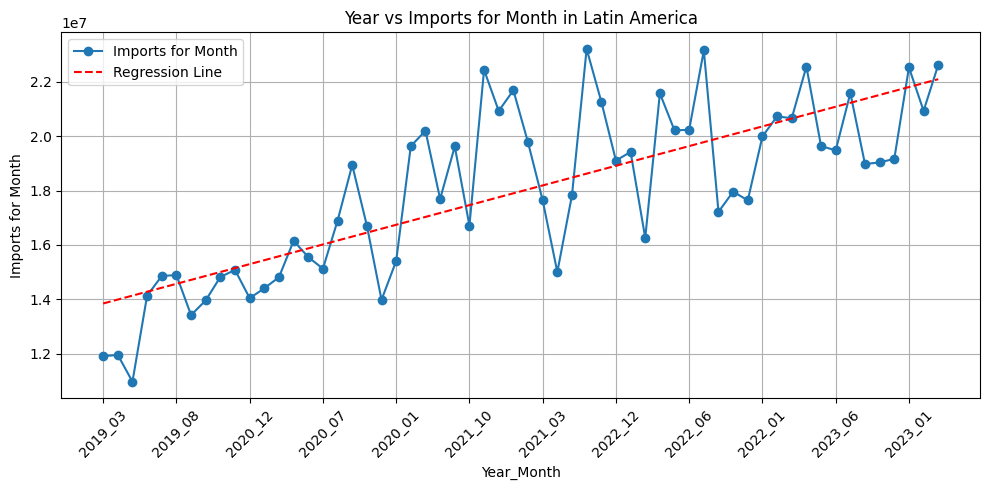

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     98.01
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.58e-14
Time:                        22:21:55   Log-Likelihood:                -966.77
No. Observations:                  58   AIC:                             1938.
Df Residuals:                      56   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.046e+09   8.16e+08     -9.855      0.0

C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\2229817788.py:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_median = latin_america_df[numeric_columns].resample('Y').median()


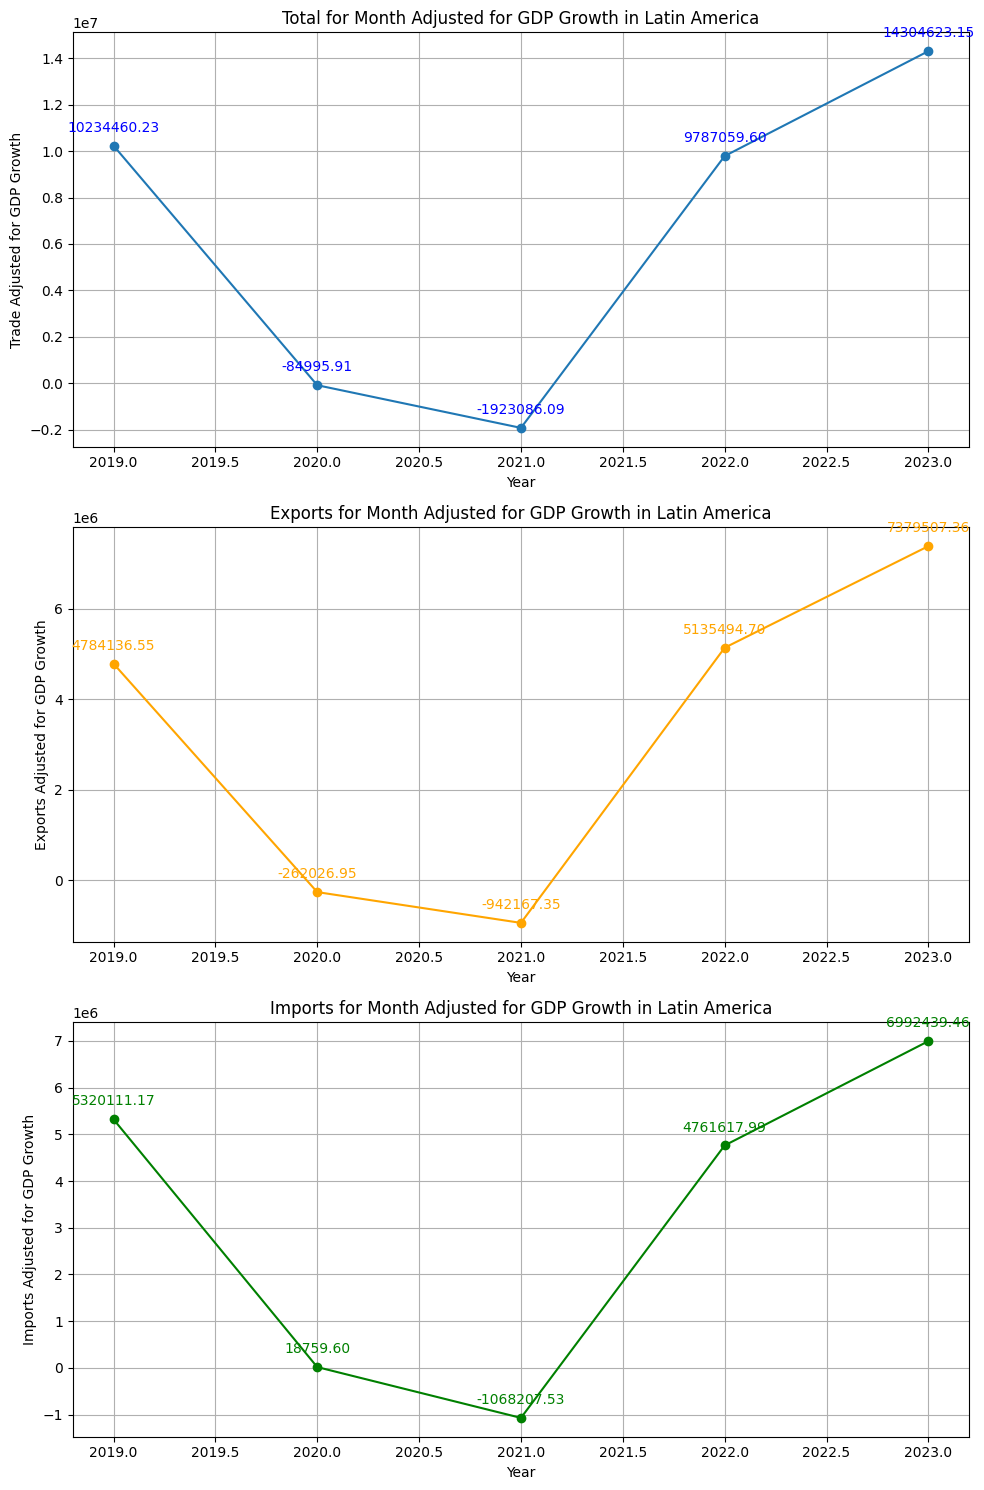

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

# Step 1: Verify unique values (optional, for debugging)
print(df['Country/region'].unique())

# Step 2: Filter the DataFrame for Latin America
latin_america_df = df[
    df['Country/region'].str.contains('Latin America:', case=False, na=False) &
    df['Year'].between(2019, 2024)
].copy()

# Step 3: Convert 'Year' to numeric
latin_america_df['Year'] = pd.to_numeric(latin_america_df['Year'], errors='coerce')

# Step 4: Sort by 'Year'
latin_america_df = latin_america_df.sort_values(by='Year')

# Step 5: Drop rows with NaN in 'Total for Month'
latin_america_df = latin_america_df.dropna(subset=['Total for Month'])

# Step 6: Inspect column names and values (optional, for debugging)
print(latin_america_df.columns)
print(latin_america_df['Total for Month'].head())

# Step 7: Clean and convert 'Total for Month' to numeric
latin_america_df['Total for Month'] = (
    latin_america_df['Total for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
latin_america_df['Total for Month'] = pd.to_numeric(latin_america_df['Total for Month'], errors='coerce')
latin_america_df = latin_america_df.dropna(subset=['Total for Month'])

# Repeat similar cleaning for 'Exports for Month' and 'Imports for Month'
for column in ['Exports for Month', 'Imports for Month']:
    print(latin_america_df[column].head())  # Inspect the column values
    latin_america_df[column] = (
        latin_america_df[column]
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.strip()
    )
    latin_america_df[column] = pd.to_numeric(latin_america_df[column], errors='coerce')
    latin_america_df = latin_america_df.dropna(subset=[column])

# Calculate statistics
print("Total for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(latin_america_df['Total for Month']),
    statistics.median(latin_america_df['Total for Month']),
    statistics.stdev(latin_america_df['Total for Month'])
))
print("Exports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(latin_america_df['Exports for Month']),
    statistics.median(latin_america_df['Exports for Month']),
    statistics.stdev(latin_america_df['Exports for Month'])
))
print("Imports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(latin_america_df['Imports for Month']),
    statistics.median(latin_america_df['Imports for Month']),
    statistics.stdev(latin_america_df['Imports for Month'])
))

# Create 'Year_Month' for plotting
latin_america_df['Year_Month'] = latin_america_df['Year'].astype(str) + '_' + latin_america_df['Month_num'].apply(lambda x: f"{x:02}")

X_numeric = np.arange(len(latin_america_df))
X = latin_america_df['Year_Month']

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = latin_america_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)
    
    tick_positions = np.arange(0, len(X), max(1, len(X)//10))  # Adjust tick frequency
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each variable with its regression line
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month in Latin America')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month in Latin America')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month in Latin America')

# OLS Regression
X = latin_america_df[['Year']]
Y = latin_america_df['Total for Month']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Convert 'Year_Month' to datetime and set as index
latin_america_df['Date'] = pd.to_datetime(latin_america_df['Year_Month'], format='%Y_%m')
latin_america_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
latin_america_df[numeric_columns] = latin_america_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
latin_america_df.dropna(subset=numeric_columns, inplace=True)

# Resample and compute median only for the selected numeric columns
annual_median = latin_america_df[numeric_columns].resample('Y').median()
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {2019: 2.64, 2020: -2.93, 2021: 6.26, 2022: 3.09, 2023: 2.72}
for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth in Latin America")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth in Latin America")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth in Latin America")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

plt.tight_layout()
plt.show()

['TOTAL' 'Asia:' 'Afghanistan ' 'Bahrian ' 'Bangladesh' 'Bhutan' 'Brunei'
 'Myanmar ' 'Cambodia' 'Cyprus' 'Korea,DPR ' 'China Hong Kong' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kuwait ' 'Lao PDR'
 'Lebanon' 'China Macau ' 'Malaysia' 'Maldives' 'Mongolia' 'Nepal,FDR'
 'Oman' 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Saudi Arabia '
 'Singapore ' 'Korea,Rep.' 'Sri Lanka' 'Syrian Arab Republic' 'Thailand'
 'Turkey' 'United Arab Emirates' 'Yemen' 'Viet Nam' 'China' 'China Taiwan'
 'Timor-Leste ' 'Kazakhstan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan'
 'Uzbekistan' 'Oth.Asia nes' 'Africa:' 'Algeria' 'Angola' 'Benin'
 'Botswana' 'Burundi' 'Cameroon' 'Canary Islands' 'Cape Verde '
 'Central African Rep.' 'Ceuta' 'Chad' 'Comoros' 'Congo' 'Djibouti'
 'Egypt ' 'Equatorial Guinea' 'Ethiopia ' 'Gabon' 'Gambia ' 'Ghana'
 'Guinea' 'Guinea-Bissau' "Cote d'Ivoire" 'Kenya' 'Liberia'
 'Libyan Arab Jamahiriya' 'Madagascar' 'Malawi' 'Mali ' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozam

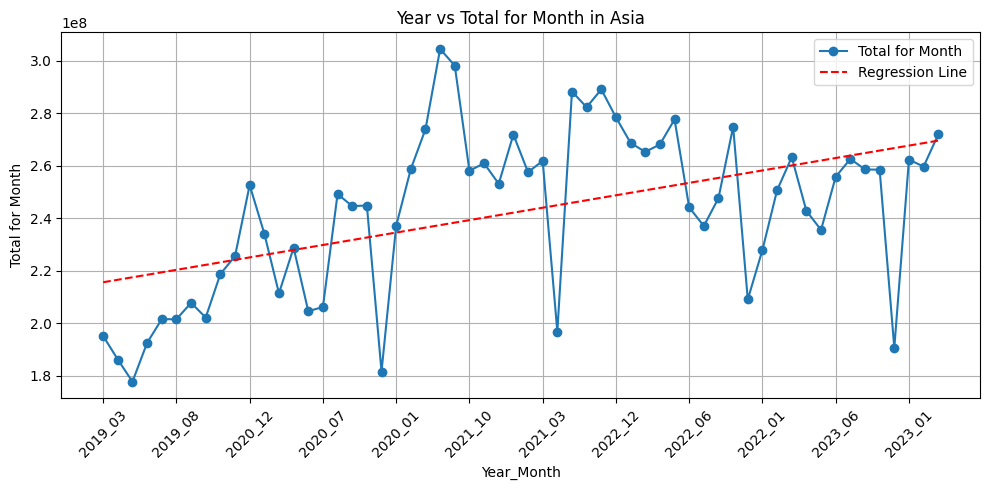

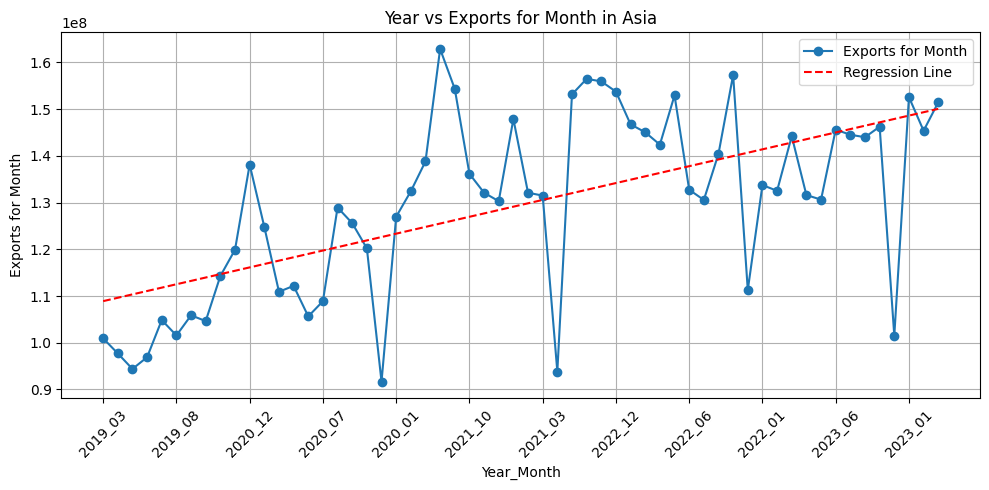

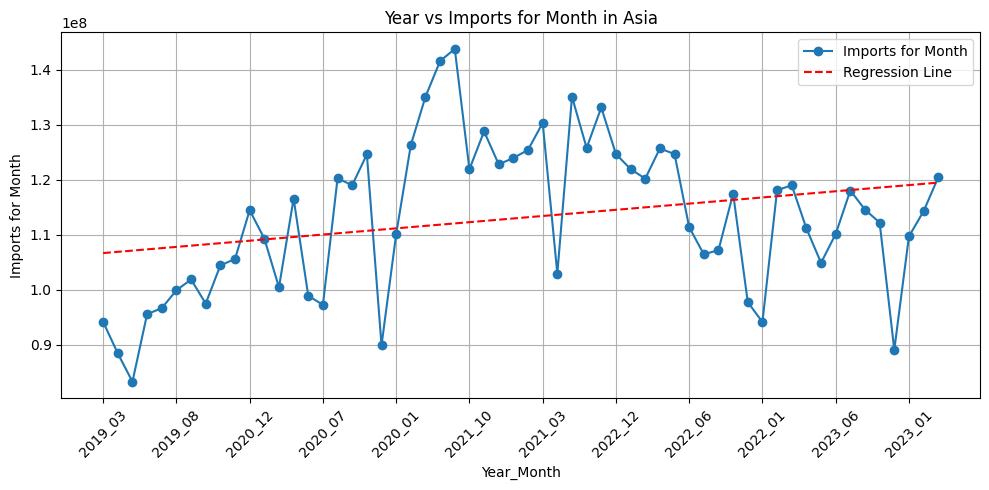

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     22.85
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.31e-05
Time:                        22:21:56   Log-Likelihood:                -1074.0
No. Observations:                  58   AIC:                             2152.
Df Residuals:                      56   BIC:                             2156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.455e+10   5.19e+09     -4.734      0.0

C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\3892219508.py:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_median = asia_df[numeric_columns].resample('Y').median()


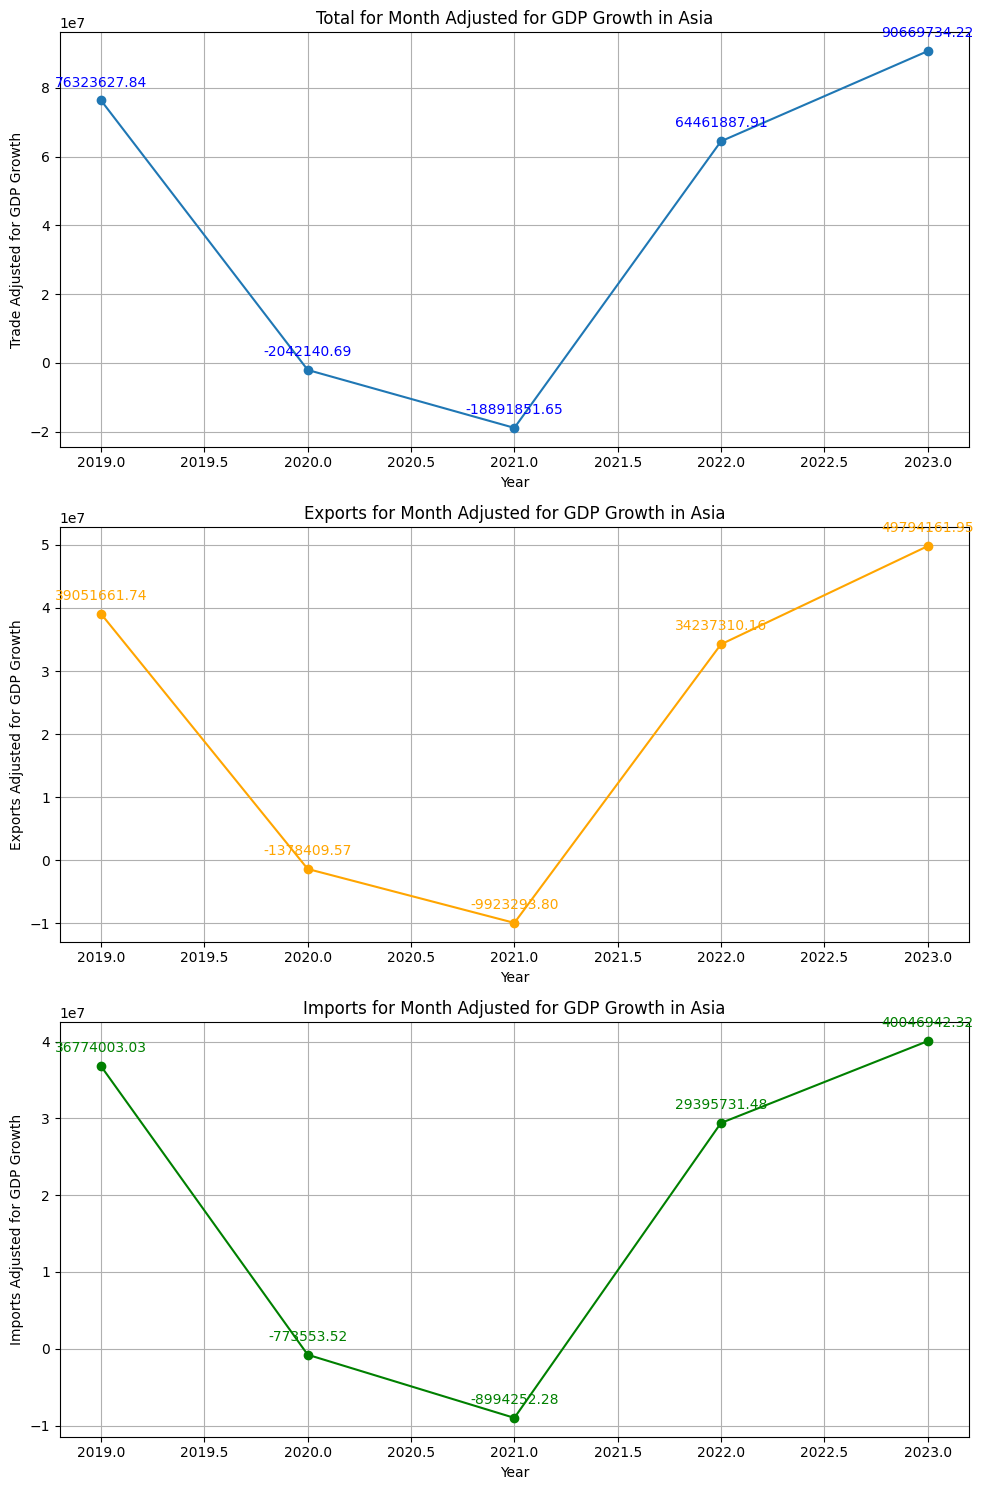

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

# Step 1: Verify unique values (optional, for debugging)
print(df['Country/region'].unique())

# Step 2: Filter the DataFrame for Asia
asia_df = df[
    df['Country/region'].str.contains('Asia:', case=False, na=False) &
    df['Year'].between(2019, 2024)
].copy()

# Step 3: Convert 'Year' to numeric
asia_df['Year'] = pd.to_numeric(asia_df['Year'], errors='coerce')

# Step 4: Sort by 'Year'
asia_df = asia_df.sort_values(by='Year')

# Step 5: Drop rows with NaN in 'Total for Month'
asia_df = asia_df.dropna(subset=['Total for Month'])

# Step 6: Inspect column names and values (optional, for debugging)
print(asia_df.columns)
print(asia_df['Total for Month'].head())

# Step 7: Clean and convert 'Total for Month' to numeric
asia_df['Total for Month'] = (
    asia_df['Total for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
asia_df['Total for Month'] = pd.to_numeric(asia_df['Total for Month'], errors='coerce')
asia_df = asia_df.dropna(subset=['Total for Month'])

# Repeat similar cleaning for 'Exports for Month' and 'Imports for Month'
for column in ['Exports for Month', 'Imports for Month']:
    print(asia_df[column].head())  # Inspect the column values
    asia_df[column] = (
        asia_df[column]
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.strip()
    )
    asia_df[column] = pd.to_numeric(asia_df[column], errors='coerce')
    asia_df = asia_df.dropna(subset=[column])

# Calculate statistics
print("Total for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(asia_df['Total for Month']),
    statistics.median(asia_df['Total for Month']),
    statistics.stdev(asia_df['Total for Month'])
))
print("Exports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(asia_df['Exports for Month']),
    statistics.median(asia_df['Exports for Month']),
    statistics.stdev(asia_df['Exports for Month'])
))
print("Imports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(asia_df['Imports for Month']),
    statistics.median(asia_df['Imports for Month']),
    statistics.stdev(asia_df['Imports for Month'])
))

# Create 'Year_Month' for plotting
asia_df['Year_Month'] = asia_df['Year'].astype(str) + '_' + asia_df['Month_num'].apply(lambda x: f"{x:02}")

X_numeric = np.arange(len(asia_df))
X = asia_df['Year_Month']

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = asia_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)
    
    tick_positions = np.arange(0, len(X), max(1, len(X)//10))  # Adjust tick frequency
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each variable with its regression line
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month in Asia')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month in Asia')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month in Asia')

# OLS Regression
X = asia_df[['Year']]
Y = asia_df['Total for Month']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Convert 'Year_Month' to datetime and set as index
asia_df['Date'] = pd.to_datetime(asia_df['Year_Month'], format='%Y_%m')
asia_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
asia_df[numeric_columns] = asia_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
asia_df.dropna(subset=numeric_columns, inplace=True)

# Resample and compute median only for the selected numeric columns
annual_median = asia_df[numeric_columns].resample('Y').median()
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {2019: 2.64, 2020: -2.93, 2021: 6.26, 2022: 3.09, 2023: 2.72}
for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth in Asia")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth in Asia")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth in Asia")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

plt.tight_layout()
plt.show()

['TOTAL' 'Asia:' 'Afghanistan ' 'Bahrian ' 'Bangladesh' 'Bhutan' 'Brunei'
 'Myanmar ' 'Cambodia' 'Cyprus' 'Korea,DPR ' 'China Hong Kong' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kuwait ' 'Lao PDR'
 'Lebanon' 'China Macau ' 'Malaysia' 'Maldives' 'Mongolia' 'Nepal,FDR'
 'Oman' 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Saudi Arabia '
 'Singapore ' 'Korea,Rep.' 'Sri Lanka' 'Syrian Arab Republic' 'Thailand'
 'Turkey' 'United Arab Emirates' 'Yemen' 'Viet Nam' 'China' 'China Taiwan'
 'Timor-Leste ' 'Kazakhstan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan'
 'Uzbekistan' 'Oth.Asia nes' 'Africa:' 'Algeria' 'Angola' 'Benin'
 'Botswana' 'Burundi' 'Cameroon' 'Canary Islands' 'Cape Verde '
 'Central African Rep.' 'Ceuta' 'Chad' 'Comoros' 'Congo' 'Djibouti'
 'Egypt ' 'Equatorial Guinea' 'Ethiopia ' 'Gabon' 'Gambia ' 'Ghana'
 'Guinea' 'Guinea-Bissau' "Cote d'Ivoire" 'Kenya' 'Liberia'
 'Libyan Arab Jamahiriya' 'Madagascar' 'Malawi' 'Mali ' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozam

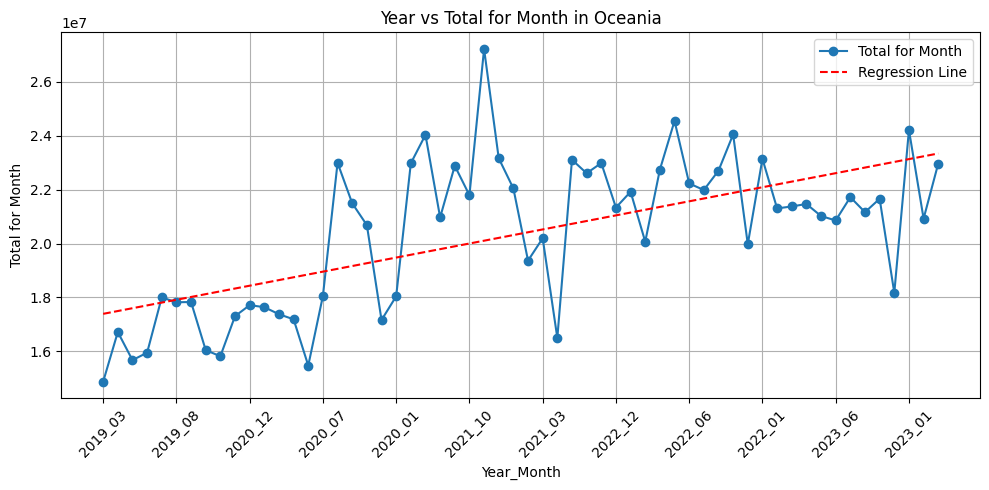

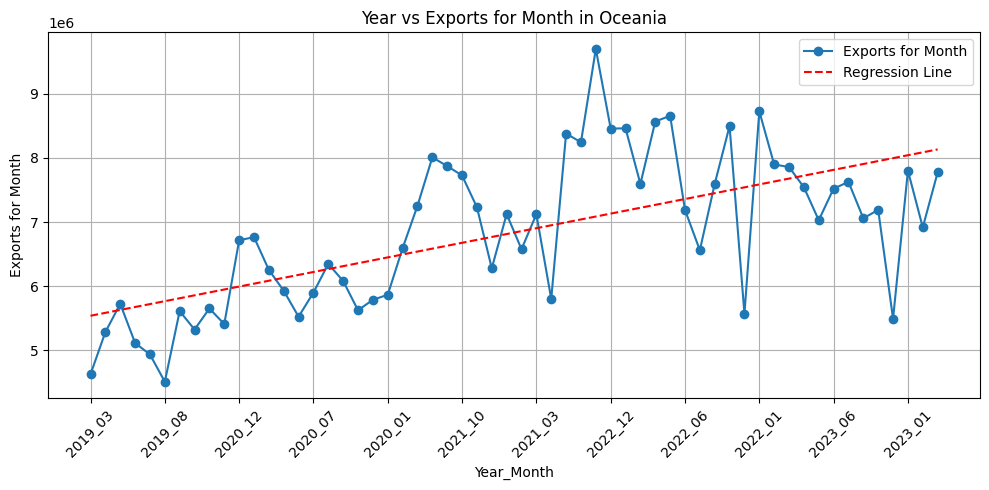

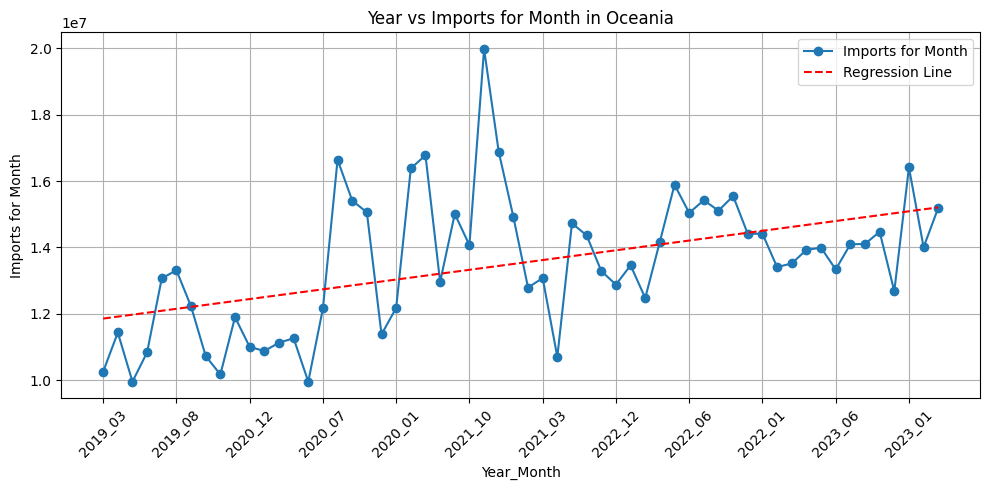

                            OLS Regression Results                            
Dep. Variable:        Total for Month   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     35.98
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.53e-07
Time:                        22:21:57   Log-Likelihood:                -928.92
No. Observations:                  58   AIC:                             1862.
Df Residuals:                      56   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.529e+09   4.25e+08     -5.950      0.0

C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\2422938012.py:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_median = oceania_df[numeric_columns].resample('Y').median()


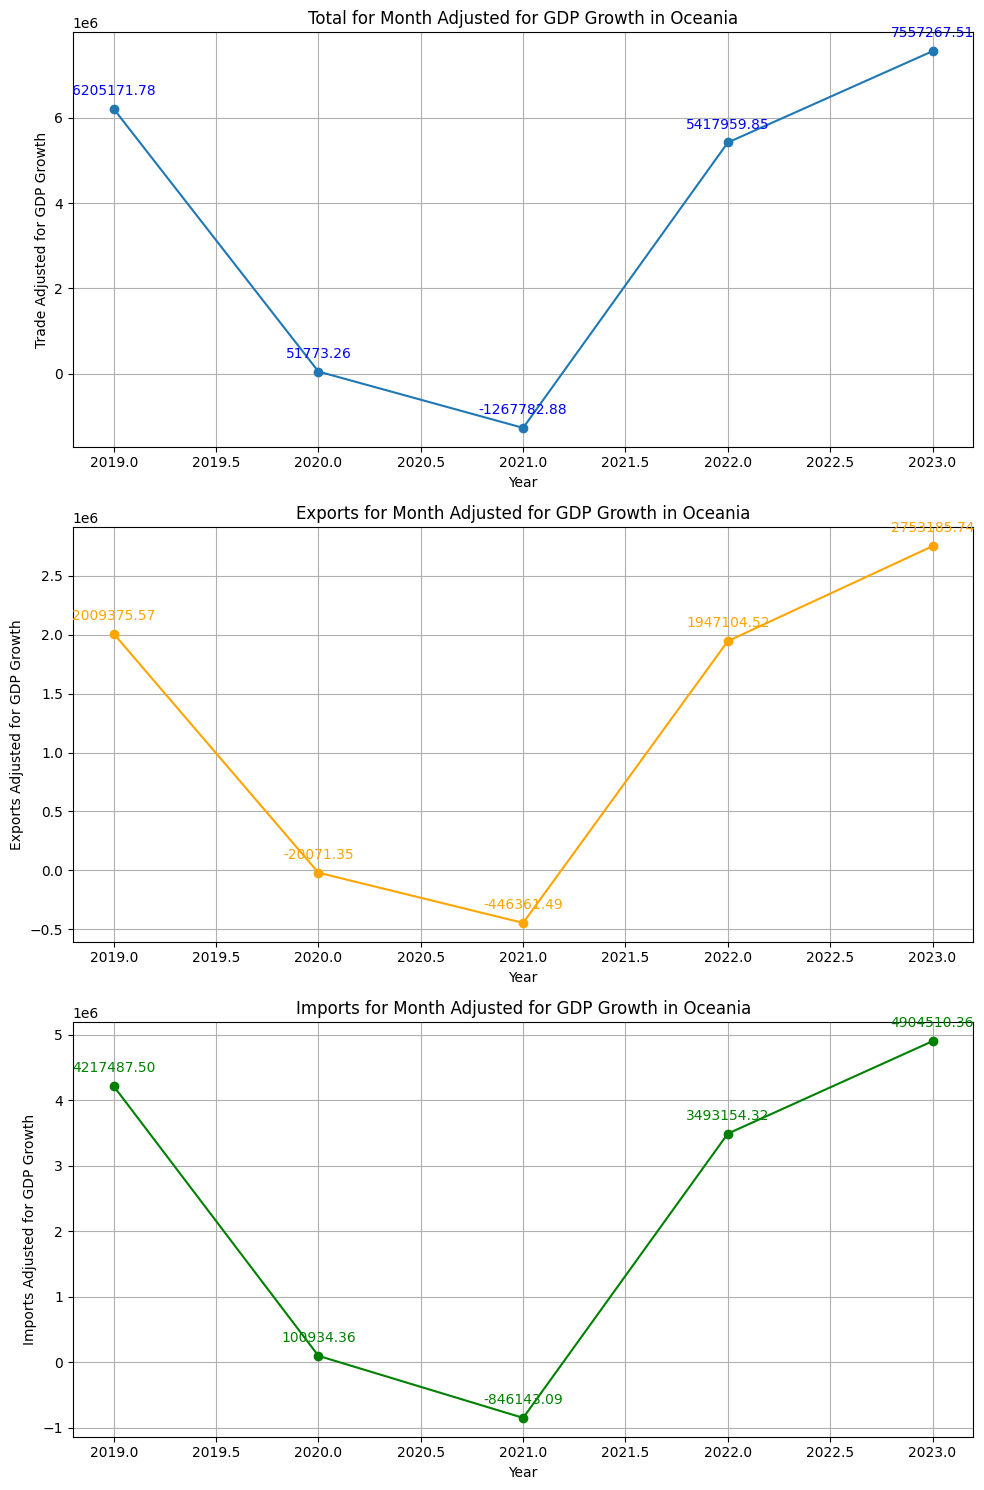

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

# Step 1: Verify unique values in 'Country/region' (optional, for debugging)
print(df['Country/region'].unique())

# Step 2: Filter the DataFrame for Oceania
oceania_df = df[
    df['Country/region'].str.contains('Oceania:', case=False, na=False) &
    df['Year'].between(2019, 2024)
].copy()

# Step 3: Convert 'Year' to numeric
oceania_df['Year'] = pd.to_numeric(oceania_df['Year'], errors='coerce')

# Step 4: Sort by 'Year'
oceania_df = oceania_df.sort_values(by='Year')

# Step 5: Drop rows with NaN in 'Total for Month'
oceania_df = oceania_df.dropna(subset=['Total for Month'])

# Step 6: Inspect column names and values (optional, for debugging)
print(oceania_df.columns)
print(oceania_df['Total for Month'].head())

# Step 7: Clean and convert 'Total for Month' to numeric
oceania_df['Total for Month'] = (
    oceania_df['Total for Month']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.strip()
)
oceania_df['Total for Month'] = pd.to_numeric(oceania_df['Total for Month'], errors='coerce')
oceania_df = oceania_df.dropna(subset=['Total for Month'])

# Repeat similar cleaning for 'Exports for Month' and 'Imports for Month'
for column in ['Exports for Month', 'Imports for Month']:
    print(oceania_df[column].head())  # Inspect the column values
    oceania_df[column] = (
        oceania_df[column]
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.strip()
    )
    oceania_df[column] = pd.to_numeric(oceania_df[column], errors='coerce')
    oceania_df = oceania_df.dropna(subset=[column])

# Calculate statistics
print("Total for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(oceania_df['Total for Month']),
    statistics.median(oceania_df['Total for Month']),
    statistics.stdev(oceania_df['Total for Month'])
))
print("Exports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(oceania_df['Exports for Month']),
    statistics.median(oceania_df['Exports for Month']),
    statistics.stdev(oceania_df['Exports for Month'])
))
print("Imports for Month: Mean = {:.2f}, Median = {:.2f}, Std Dev = {:.2f}".format(
    statistics.mean(oceania_df['Imports for Month']),
    statistics.median(oceania_df['Imports for Month']),
    statistics.stdev(oceania_df['Imports for Month'])
))

# Create 'Year_Month' for plotting
oceania_df['Year_Month'] = oceania_df['Year'].astype(str) + '_' + oceania_df['Month_num'].apply(lambda x: f"{x:02}")

X_numeric = np.arange(len(oceania_df))
X = oceania_df['Year_Month']

# Function to plot with regression line
def plot_with_regression(y_var, y_label, title):
    Y = oceania_df[y_var]
    slope, intercept = np.polyfit(X_numeric, Y, 1)
    regression_line = slope * X_numeric + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, marker='o', linestyle='-', label=y_label)
    plt.plot(X, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.xlabel('Year_Month')
    plt.ylabel(y_label)
    plt.title(title)
    
    tick_positions = np.arange(0, len(X), max(1, len(X)//10))  # Adjust tick frequency
    tick_labels = X.iloc[tick_positions]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each variable with its regression line
plot_with_regression('Total for Month', 'Total for Month', 'Year vs Total for Month in Oceania')
plot_with_regression('Exports for Month', 'Exports for Month', 'Year vs Exports for Month in Oceania')
plot_with_regression('Imports for Month', 'Imports for Month', 'Year vs Imports for Month in Oceania')

# OLS Regression
X = oceania_df[['Year']]
Y = oceania_df['Total for Month']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Convert 'Year_Month' to datetime and set as index
oceania_df['Date'] = pd.to_datetime(oceania_df['Year_Month'], format='%Y_%m')
oceania_df.set_index('Date', inplace=True)

# Ensure columns for aggregation are numeric
numeric_columns = ['Total for Month', 'Exports for Month', 'Imports for Month']
oceania_df[numeric_columns] = oceania_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
oceania_df.dropna(subset=numeric_columns, inplace=True)

# Resample and compute median only for the selected numeric columns
annual_median = oceania_df[numeric_columns].resample('Y').median()
annual_median.index = annual_median.index.year

# Global GDP growth data for adjustment
gdp_growth = {2019: 2.64, 2020: -2.93, 2021: 6.26, 2022: 3.09, 2023: 2.72}
for year in annual_median.index:
    if year in gdp_growth and gdp_growth[year] != 0:
        annual_median.loc[year] /= gdp_growth[year]

smoothed_data = annual_median.rolling(window=2, min_periods=1).mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def annotate_points(ax, data, color):
    for i, (year, value) in enumerate(data.items()):
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points",
                    xytext=(0, 10), ha='center', color=color)

axs[0].plot(smoothed_data.index, smoothed_data['Total for Month'], marker='o')
axs[0].set_title("Total for Month Adjusted for GDP Growth in Oceania")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Trade Adjusted for GDP Growth')
axs[0].grid(True)
annotate_points(axs[0], smoothed_data['Total for Month'], 'blue')

axs[1].plot(smoothed_data.index, smoothed_data['Exports for Month'], marker='o', color='orange')
axs[1].set_title("Exports for Month Adjusted for GDP Growth in Oceania")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exports Adjusted for GDP Growth')
axs[1].grid(True)
annotate_points(axs[1], smoothed_data['Exports for Month'], 'orange')

axs[2].plot(smoothed_data.index, smoothed_data['Imports for Month'], marker='o', color='green')
axs[2].set_title("Imports for Month Adjusted for GDP Growth in Oceania")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Imports Adjusted for GDP Growth')
axs[2].grid(True)
annotate_points(axs[2], smoothed_data['Imports for Month'], 'green')

plt.tight_layout()
plt.show()

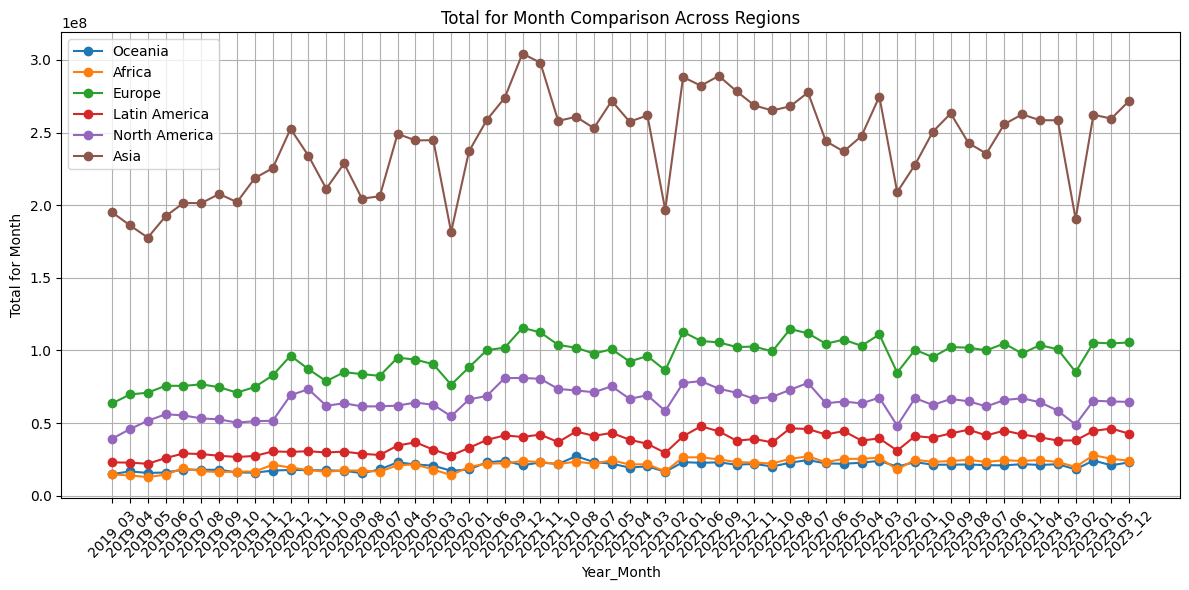

In [13]:
import matplotlib.pyplot as plt

# Define the regions and corresponding dataframes
regions = ['Oceania', 'Africa', 'Europe', 'Latin America', 'North America', 'Asia']
dataframes = [oceania_df, africa_df, europe_df, latin_america_df, north_america_df, asia_df]

# Create a single figure for overlaying the plots
plt.figure(figsize=(12, 6))

# Iterate through each region and dataframe
for region, df in zip(regions, dataframes):
    if not df.empty:
        # Plot each region's data in the same Axes
        plt.plot(df['Year_Month'], df['Total for Month'], marker='o', linestyle='-', label=region)

# Set labels and title
plt.xlabel('Year_Month')
plt.ylabel('Total for Month')
plt.title('Total for Month Comparison Across Regions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend for clarity
plt.grid(True)
plt.legend()

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

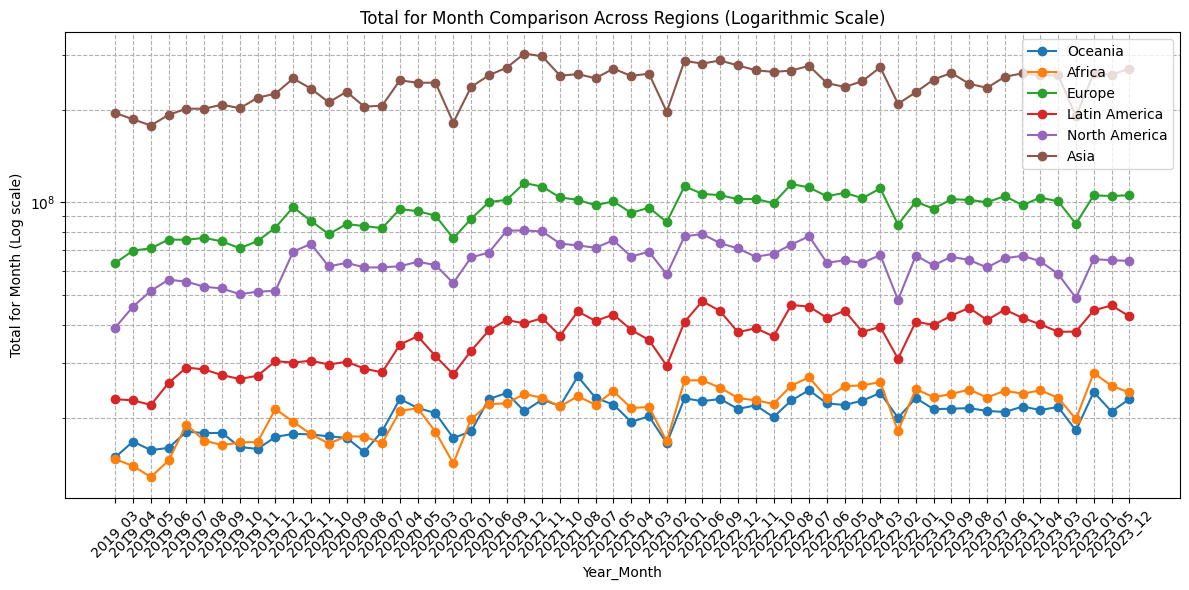

In [14]:
import matplotlib.pyplot as plt

# Define the regions and corresponding dataframes
regions = ['Oceania', 'Africa', 'Europe', 'Latin America', 'North America', 'Asia']
dataframes = [oceania_df, africa_df, europe_df, latin_america_df, north_america_df, asia_df]

# Create a single figure for overlaying the plots
plt.figure(figsize=(12, 6))

# Iterate through each region and dataframe
for region, df in zip(regions, dataframes):
    if not df.empty:
        # Plot each region's data in the same Axes with logarithmic y-axis
        plt.plot(df['Year_Month'], df['Total for Month'], marker='o', linestyle='-', label=region)

# Set labels and title
plt.xlabel('Year_Month')
plt.ylabel('Total for Month (Log scale)')
plt.title('Total for Month Comparison Across Regions (Logarithmic Scale)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add grid and legend for clarity
plt.grid(True, which="both", ls="--")  # Show grid for both major and minor ticks
plt.legend()

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
import pandas as pd

# Load democracy data into df_dem
file_path2 = r"C:\Users\jonca\Downloads\New Final Project\democracy-index-eiu\democracy-index-eiu.csv"
df_dem = pd.read_csv(file_path2)
file_path = 'C:/Users/jonca/Downloads/New Final Project/All Trade Information/Everything.xlsx'
df = pd.read_excel(file_path) # Use smaller data types where possible

# Merge the trade data with the democracy data on country and year
df_merged = df.merge(
    df_dem,
    left_on=['Country/region', 'Year'],
    right_on=['Entity', 'Year'],
    how='inner'  # Inner join automatically removes non-matching entries
)

# Display merged and filtered data
print(df_merged.head())

        Source Month  Month_num  Year Country/region Total for Month  \
0  Jan_Feb.xls   Jan          1  2019     Bangladesh       2,265,823   
1  Jan_Feb.xls   Jan          1  2019         Bhutan           1,556   
2  Jan_Feb.xls   Jan          1  2019       Cambodia       1,151,581   
3  Jan_Feb.xls   Jan          1  2019         Cyprus         179,927   
4  Jan_Feb.xls   Jan          1  2019          India      12,214,581   

  Total YTD Exports for Month Exports YTD Imports for Month Imports YTD  \
0       NaN         2,128,760         NaN           137,063         NaN   
1       NaN             1,555         NaN                 1         NaN   
2       NaN           953,495         NaN           198,086         NaN   
3       NaN           178,179         NaN             1,747         NaN   
4       NaN         9,616,049         NaN         2,598,532         NaN   

  Percentage Change YoY Exports YoY change Imports YoY change      Entity  \
0                 -22.6              -2

In [16]:
import pandas as pd
import numpy as np

# Function to convert column with potential non-string types to strings, clean, and convert to numeric
def clean_and_convert(column):
    # Convert entire column to string, in case there are already numeric values or NaN
    cleaned_column = df_merged[column].astype(str)
    # Remove commas
    cleaned_column = cleaned_column.str.replace(',', '', regex=False)
    # Replace dash with NaN
    cleaned_column = cleaned_column.replace('-', np.nan)
    # Convert to float
    return cleaned_column.astype(float)

# Ensure df_merged is your correct DataFrame
# Apply the function to the specified columns
columns_to_clean = ['Total for Month', 'Exports for Month', 'Imports for Month', 'Democracy score']
for column in columns_to_clean:
    df_merged[column] = clean_and_convert(column)

# Display the cleaned DataFrame
print(df_merged)

           Source Month  Month_num  Year Country/region  Total for Month  \
0     Jan_Feb.xls   Jan          1  2019     Bangladesh        2265823.0   
1     Jan_Feb.xls   Jan          1  2019         Bhutan           1556.0   
2     Jan_Feb.xls   Jan          1  2019       Cambodia        1151581.0   
3     Jan_Feb.xls   Jan          1  2019         Cyprus         179927.0   
4     Jan_Feb.xls   Jan          1  2019          India       12214581.0   
...           ...   ...        ...   ...            ...              ...   
6688      Dec.xls   Dec         12  2023       Suriname          31536.0   
6689      Dec.xls   Dec         12  2023        Uruguay         459396.0   
6690      Dec.xls   Dec         12  2023  United States       57181510.0   
6691      Dec.xls   Dec         12  2023           Fiji          52279.0   
6692      Dec.xls   Dec         12  2023    New Zealand        1653832.0   

        Total YTD  Exports for Month  Exports YTD  Imports for Month  \
0             N

C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\705357528.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Intercept'] = 1
C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\705357528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Log_Exports'] = np.log(group['Exports for Month'])
C:\Users\jonca\AppData\Local\Temp\ipykernel_3880\705357528.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

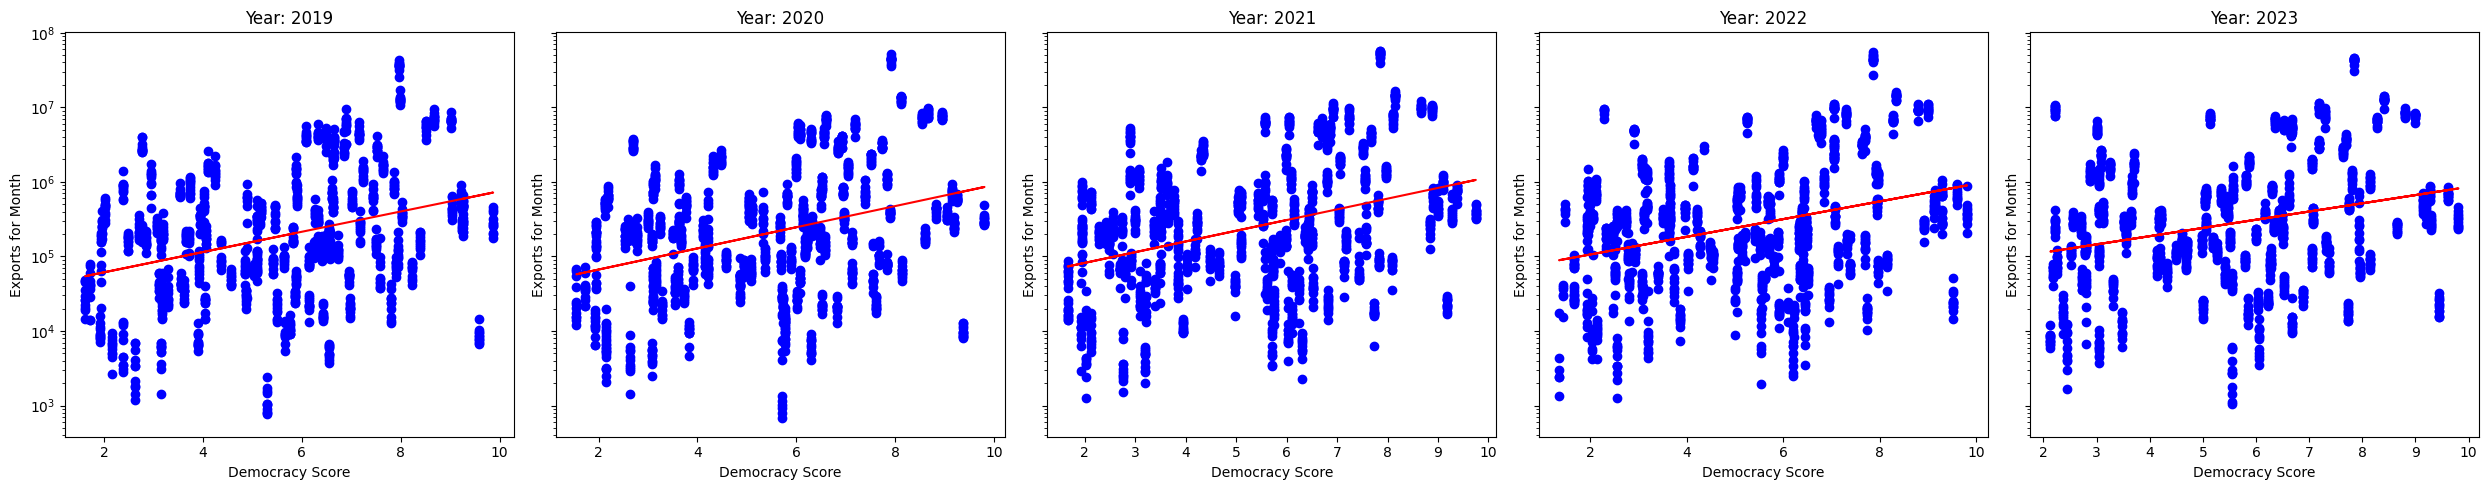

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Group data by year
groups = df.groupby('Year')

# Create a figure with subplots, one for each year
num_years = len(groups)
fig, axs = plt.subplots(1, num_years, figsize=(5 * num_years, 5), sharey=True)

# Iterate over each year and its corresponding data
for ax, (year, group) in zip(axs, groups):
    # Ensure non-zero values for log transformation
    group = group[group['Exports for Month'] > 0]

    # Add a constant (intercept) to the model for regression
    group['Intercept'] = 1

    # Log-transform the 'Exports_for_Month'
    group['Log_Exports'] = np.log(group['Exports for Month'])

    # Define the dependent and independent variables
    X = group[['Intercept', 'Democracy score']]
    Y = group['Log_Exports']

    # Perform the regression
    model = sm.OLS(Y, X).fit()

    # Prepare data for plotting (using exponential to revert the log transformation for the line)
    exp_preds = np.exp(model.predict(X))

    # Plot the original data and the regression line
    ax.scatter(group['Democracy score'], group['Exports for Month'], color='blue', label='Data')
    ax.plot(group['Democracy score'], exp_preds, color='red', label='Regression Line')

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Set title and labels
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Democracy Score')
    ax.set_ylabel('Exports for Month')

# Adjust layout for neatness
plt.tight_layout()
plt.show()